In [11]:
import jtnn
import jtnn.utils as utils
from jtnn.metrics import get_closest_molecules_ged, external_diversity, internal_diversity
import rdkit.Chem as Chem

import matplotlib.pyplot as pyplot
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

Open the train file and load all the molecules

In [2]:
train_limit = None
train_set = utils.load_smiles_data("data/train.txt", train_limit)

Open the generated file and load all the molecules

In [3]:
generated_limit = None
generated_beta0_001 = utils.load_smiles_data("data/samples_MPNVAE-h450-L56-d3-beta0.001.txt", generated_limit)
generated_beta0_005 = utils.load_smiles_data("data/samples_MPNVAE-h450-L56-d3-beta0.005.txt", generated_limit)
generated_noKL = utils.load_smiles_data("data/samples_MPNVAE-h450-L56-d3-noKL.txt", generated_limit)

Find the closest molecules of the generated molecule based on the graph edit distance

In [ ]:
generated_mol = generated_beta0_001[0]
batch_size = 1000
top = 10
closest_molecules = get_closest_molecules_ged(batch_size, train_set, generated_mol, top)
print(closest_molecules)

Write the top closest molecules to a file

In [ ]:
with open('data/ged.txt', 'w') as f:
    f.write("{0:.2f} {1} \n".format(0, generated_mol))
    for mol in closest_molecules:
        f.write("{0:.2f} {1}\n".format(mol[0], mol[1]))

Draw the molecules images

In [ ]:
mols = [jtnn.chemutils.get_mol(generated_mol)]


for _, smiles in closest_molecules:
    mols.append(jtnn.chemutils.get_mol(smiles))

images = Chem.Draw.MolsToImage(mols)
images.save('closest_molecules.png')

![Closest molecules](closest_molecules.png)

Internal Chemical Diversity in model MPNVAE-h450-L56-d3-beta0.001

In [4]:
print("Internal diversity: {0:.4f}".format(internal_diversity(generated_beta0_001)))

0
Internal diversity: 0.6530


Internal Chemical Diversity in model MPNVAE-h450-L56-d3-beta0.005

In [5]:
print("Internal diversity: {0:.4f}".format(internal_diversity(generated_beta0_005)))

0
Internal diversity: 0.6607


Internal Chemical Diversity in model MPNVAE-h450-L56-d3-noKL

In [6]:
print("Internal diversity: {0:.4f}".format(internal_diversity(generated_noKL)))

0
Internal diversity: 0.7377


External Chemical Diversity between train set and model MPNVAE-h450-L56-d3-beta0.001 

In [7]:
print("External diversity: {0:.4f}".format(external_diversity(train_set, generated_beta0_001)))

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
External diversity: 0.6558


External Chemical Diversity between train set and model MPNVAE-h450-L56-d3-beta0.005

In [8]:
print("External diversity: {0:.4f}".format(external_diversity(train_set, generated_beta0_005)))

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
External diversity: 0.6591


External Chemical Diversity between train set and model MPNVAE-h450-L56-d3-beta-noKL

In [9]:
print("External diversity: {0:.4f}".format(external_diversity(train_set, generated_noKL)))

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
External diversity: 0.6971


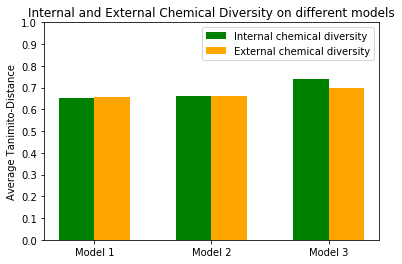

In [15]:
chemical_diversity = np.asarray([
        [0.6530, 0.6558],
        [0.6607, 0.6591],
        [0.7377, 0.6971]])

legends = ["Internal chemical diversity", "External chemical diversity"]

x = np.asarray([1, 2, 3])
y = np.arange(0, 11)
x_text = ["Model 1", "Model 2", "Model 3"]

fig, ax = pyplot.subplots(1)

colors = ['green', 'orange']
ax.bar(x-0.15, height=chemical_diversity[:, 0], width=0.30, color=colors[0])
ax.bar(x+0.15, height=chemical_diversity[:, 1], width=0.30, color=colors[1])
ax.plot()
ax.legend(legends)
pyplot.ylabel("Average Tanimito-Distance")
pyplot.title("Internal and External Chemical Diversity on different models")
pyplot.xticks(x, x_text)
pyplot.yticks(y/10)

pyplot.show()

Model 1: Beta with 0.001

Model 2: Beta with 0.005

Model 3: No KL